In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from datetime import datetime
from collections import Counter

In [3]:
tweets = pd.read_csv('./data/WorldCup/tweets_clean.csv')

In [5]:
tweets['created_at'] = tweets.created_at.apply(lambda str_date: datetime.strptime(str_date[:10], '%Y-%m-%d').date())

In [6]:
all_downloaded_dates = list(tweets.created_at)

In [7]:
downloaded_dates_with_occ = Counter(all_downloaded_dates)

In [9]:
# hardcoding them to determine order
downloaded_dates = [
         datetime(2022, 11, 21).date(),
         datetime(2022, 11, 23).date(),
         datetime(2022, 11, 24).date(),
         datetime(2022, 11, 25).date(),
         datetime(2022, 11, 26).date(),
         datetime(2022, 11, 27).date(),
         datetime(2022, 11, 28).date(),
         datetime(2022, 11, 29).date(),
         datetime(2022, 11, 30).date(),
         datetime(2022, 12, 1).date(),
         datetime(2022, 12, 2).date(),
         datetime(2022, 12, 3).date(),
         datetime(2022, 12, 4).date(),
         datetime(2022, 12, 5).date(),
         datetime(2022, 12, 18).date(),
         datetime(2022, 12, 19).date(),
         datetime(2022, 12, 20).date(),
         datetime(2022, 12, 21).date()
    ]

### Set of used funtion

In [11]:
# funtion to tranform string (e.g. "['I' ,'am', 'Hanz']") to a list
def list_capture(input_str: str):
    input_str = input_str[1:-1]
    just_commas = re.sub('\'', '', input_str)
    # removing spaces
    no_spaces = re.sub(' ', '', just_commas)
    
    str_list = no_spaces.split(',')
    
    output_list = []
    for ele in str_list:
        output_list.append(str(ele))

    return output_list

In [14]:
# funtion to get n most popular hashtag in given dataframe
def get_most_popular_hashtags(df: pd.DataFrame, n_best: int):
    all_hastags = []

    for hashtags in df.hashtags_list:
        hashtags = list_capture(hashtags)

        all_hastags.extend(hashtags)

    hashtags_occurences = dict(Counter(all_hastags))

    most_popular_hashtags = list(dict(sorted(hashtags_occurences.items(), key=lambda item: item[1])).keys())[-n_best:]
    
    most_popular_hashtags.reverse()
    return most_popular_hashtags

In [16]:
# funtion which allows to get number of occurences for a given hashtag for each day
def get_dates_of_hashtag(hashtag: str, df):
    date_and_occurences = {}
    
    for date in downloaded_dates:
        date_and_occurences[date] = 0

    for _, row in df.iterrows():
        if hashtag in list_capture(row.hashtags_list):
            date_and_occurences[row.created_at] += 1 
            
    
    return date_and_occurences

In [17]:
# funtion to count daily procentage of usage
def get_daily_percentage(date_and_occurences, date_and_ntweets):
    date_and_percentage = {}
    
    for date, occ_n in date_and_occurences.items():
        date_and_percentage[date] = occ_n/date_and_ntweets[date] * 100
        
    return date_and_percentage

In [21]:
messi = get_dates_of_hashtag('messi', tweets)

messi_percentage = get_daily_percentage(messi, downloaded_dates_with_occ)

In [24]:
mahsa = get_dates_of_hashtag('mahsaamini', tweets)

mahsa_percentage = get_daily_percentage(mahsa, downloaded_dates_with_occ)

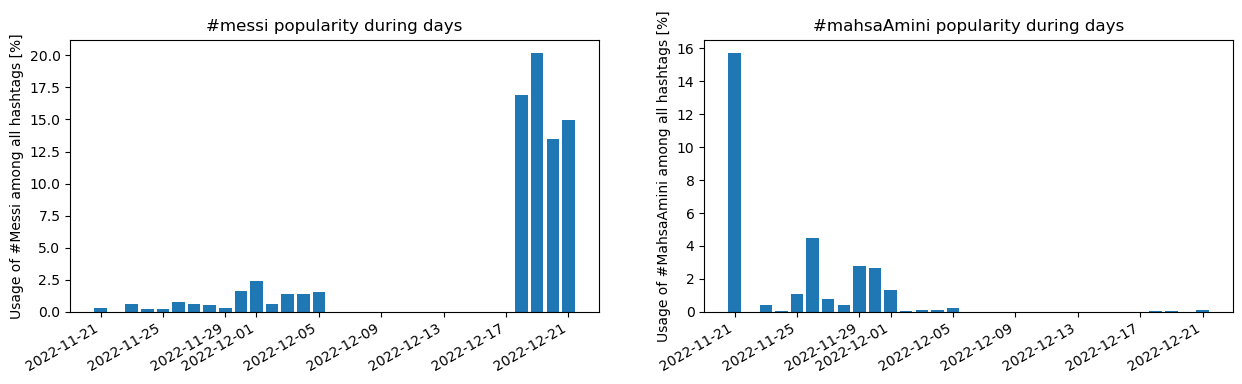

In [29]:
# some matplotlib magic
fig, axs = plt.subplots(1, 2, figsize=(15,4))

axs[0].bar(downloaded_dates, messi_percentage.values())
axs[0].set_title("#messi popularity during days")
axs[0].set_ylabel("Usage of #Messi among all hashtags [%]")


axs[1].bar(downloaded_dates, mahsa_percentage.values())
axs[1].set_title("#mahsaAmini popularity during days")
axs[1].set_ylabel("Usage of #MahsaAmini among all hashtags [%]")


plt.savefig('messi-mahsaamini-popularity.png')
plt.gcf().autofmt_xdate()

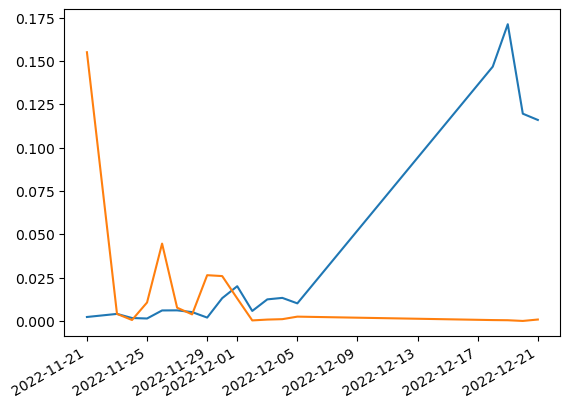

In [136]:
plt.bar(downloaded_dates, messi_percentage.values())
plt.plot(downloaded_dates, mahsa_percentage.values())
plt.gcf().autofmt_xdate()

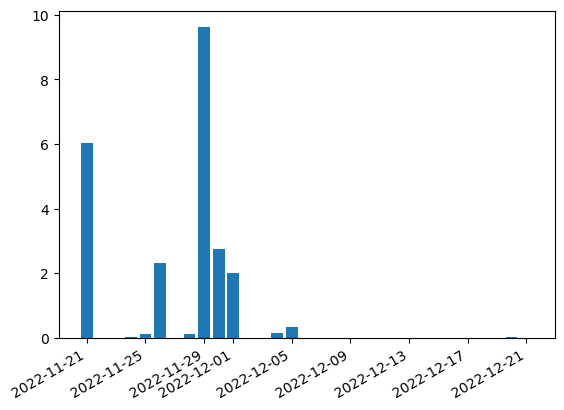

In [171]:
saytheirnames = get_dates_of_hashtag('SayTheirNames', tweets)
saytheirnames_percentage = get_daily_percentage(saytheirnames, downloaded_dates_with_occ)
plt.bar(downloaded_dates, saytheirnames_percentage.values())
plt.gcf().autofmt_xdate()